In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##III. The Law of Large Number (LLN) and the Central Limit Theorem (CLT)
1. Generate two sets of independent random samples, X and Y. X has 100 observations and Y has 10,000 observations. Both are from an i.i.d. $ \chi^2(5) $ distribution. Report the means of X and Y. Which is closer to the theoretical mean of a $ \chi^2(5) $ distribution?

2. To demonstrate the Lindberg-Levy CLT, please generate 1000 sets of independent random samples, each has 1000 observations, from an i.i.d. $ \chi^2(5) $ distribution. First choose one set of the random samples and plot a histogram. Do you see a $ \chi^2(5) $ distribution? Denote the sample mean of each set of random samples as Z, and plot the histogram of Z. Do you see a normal distribution? What are the empirical mean and empirical variance of Z? Are they close to what CLT predicts?


In [ ]:
# 1

N = 100
M = 10000

x = np.random.chisquare(5, N)
y = np.random.chisquare(5, M)

mean_x = np.mean(x)
mean_y = np.mean(y)

print('mean X = %7f, mean Y = %7f' %(mean_x, mean_y))

if np.absolute(mean_x - 5) > np.absolute(mean_y - 5):
    print('Means of Y is closer to the theoretical mean of a chisquare(5) dist.')
else:
    print('Means of X is closer to the theoretical mean of a chisquare(5) dist.')

mean X = 5.036084, mean Y = 4.985308
Means of Y is closer to the theoretical mean of a chisquare(5) dist.


The empirical mean is 4.995817642580672.
The empirical variance is 0.009785651017126378.


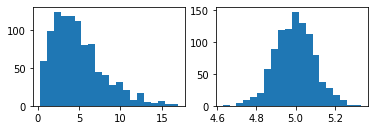

In [ ]:
# 2

z = np.random.chisquare(5, (1000,1000)) # create a 1000 x 1000 matrix
Z = []

# use for loop to generate 1000 different sample mean
for i in range(1, 1000, 1):
    Z.append(np.mean(z[i]))

# draw the histogram of z and the dist. of each sample's mean   
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.hist(z[0], bins = 20)
ax2.hist(Z, bins = 20)

print(f'The empirical mean is {str(np.mean(Z))}.')
print(f'The empirical variance is {str(np.var(Z))}.')

##IV. Use the OLS method to estimate a linear multiple regression model
Consider a regression model $y_i = \alpha + \beta_1 x_{1i} + \beta_2 x_{2i} + \epsilon_i $. The Data Generating Process (DGP) is based on this regression model as well as the parameters designed as follows: $ x_{1i} \sim N(2, 1) $, $x_{2i} \sim Poisson(4)$, $ \epsilon_i \sim N(0, 1)$, $\theta = (\alpha, \beta_1, \beta_2) = (1, 1, -2)$.
1. Generate 100 independent random samples of (y, $x_1$, $x_2$) using the DGP as stated above.
2. Calculate and report the estimate $\hat{\theta}$ and its covariance matrix using the OLS formula.
3. Now change the distribution of $x_{1i}$ in DGP to N(2, 36). Repeat steps 1 and 2. Compare your results with step 2, What do you see in the variance of $\hat{\theta}$?
4. Repeat step 1 and step 2 for 1000 times and record $\hat{\theta}$ for each repetition. Plot the (empirical) distributions of $\hat{\alpha}$, $\hat{\beta_1}$ and $\hat{\beta_2}$. Compare it with the limiting distributions of $\hat{\alpha}$, $\hat{\beta_1}$ and $\hat{\beta_2}$, what do you 
find?

In [ ]:
def ols_beta(x1, x2, y1):
    one = np.ones(100)
    X_T = np.matrix([one, x1, x2])
    X = X_T.T
    XTX = np.dot(X_T, X)
    invXTX = XTX.I
    beta = np.dot(np.dot(invXTX, X_T),y1)
    return beta
    
def cov_beta(x1, x2, y1, sigma):
    one = np.ones(100)
    X_T = np.matrix([one, x1, x2])
    X = X_T.T
    XTX = np.dot(X_T, X)
    invXTX = XTX.I
    return sigma * invXTX

In [ ]:
# 1

# Run Simulation on "True" Model: y = a + b_1 * x_1 + b_2 * x_2 + e
x1 = np.random.normal(2, 1, 100)
x2 = np.random.poisson(4, 100)
e = np.random.normal(0, 1, 100)
one = np.ones(100)

y1 = one + 1 * x1 - 2 * x2 + e
print('The first 10 generated data is:', y1[:10])

The first 10 generated data is: [ -3.43302777  -4.5865125   -6.29660734  -5.37245196 -12.16376465
  -2.07027629  -6.7039128  -12.16836257 -11.2604375    3.04486024]


In [ ]:
# 2

# Run OLS on simulated data
print(ols_beta(x1, x2, y1))
print(cov_beta(x1, x2, y1, 1))

[[ 0.65463897  1.03810408 -1.96938344]]
[[ 0.10314502 -0.02309288 -0.01137135]
 [-0.02309288  0.01096315  0.00045069]
 [-0.01137135  0.00045069  0.00245928]]


In [ ]:
# 3

# Run again on x1i~N(2,36)
x11 = np.random.normal(2,36,100)
y2 = one + x11 - 2 * x2 + e
print(ols_beta(x1, x2, y2))
print(cov_beta(x11, x2, y2, 1))

BETAS = []

[[27.1209015  -5.49830225 -3.3719422 ]]
[[ 5.60360224e-02 -1.03622241e-04 -1.05437577e-02]
 [-1.03622241e-04  6.99945622e-06  8.22407148e-06]
 [-1.05437577e-02  8.22407148e-06  2.45041372e-03]]


Their plots look like normal distribution centered at their theoretical values.


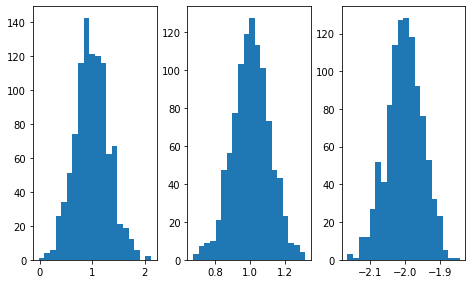

In [ ]:
# 4

# repeat 1000 times for 1 & 2
for i in range(0, 1000):
  x_1i = np.random.normal(2,1,100)
  x_2i = np.random.poisson(4, 100)
  Ei = np.random.normal(0,1,100)
  Yi = 1 + x_1i - 2 * x_2i + Ei
  BETAS.append(ols_beta(x_1i,x_2i, Yi))
  
A = [BETAS[i][0, 0] for i in range(0,1000)]
Theta_1 = [BETAS[i][0, 1] for i in range(0,1000)]
Theta_2 = [BETAS[i][0, 2] for i in range(0,1000)]

plt.subplot(1,3,1)
plt.hist(A, bins = 20)
plt.subplot(1,3,2)
plt.hist(Theta_1, bins = 20)
plt.subplot(1,3,3)
plt.hist(Theta_2, bins = 20)
plt.subplots_adjust(left=0,right=1,bottom=0,wspace=0.25,hspace=0)

print('Their plots look like normal distribution centered at their theoretical values.') 

##V. Initiation of young adults' smoking
Use the dataset "smoke" to perform a
regression analysis. The dependent variable smoke dum equals to one if an individual is a smoker.

In [ ]:
import io
from google.colab import files
uploaded = files.upload()

# change the filename to match the uploaded file's
smoke = pd.read_csv(io.BytesIO(uploaded['smoke.csv']))
smoke.head()

Saving smoke.csv to smoke.csv


,smoke_dum,neuroticism,conscientiousness,extraversion,smoke_parent,parent_control,maternal_care,taught,male,black,hisp,asian,race_other,prof,home,job_other
0,0,-0.366439,-0.089068,0.122580,0,1.000000,4.0,1,0,1,0,0,0,1,0,0
1,0,0.854280,-0.831106,-0.196342,0,0.571429,3.5,0,0,0,0,0,0,0,1,0
2,0,-0.664958,-2.451764,-0.196342,1,0.714286,2.5,0,0,0,0,0,0,0,0,0
3,0,0.854280,1.565015,0.076363,1,0.571429,4.5,1,1,0,0,0,0,0,1,0
4,0,0.372878,0.226089,0.076363,1,0.571429,5.0,0,0,0,0,1,0,0,1,0


In [ ]:
# State the dependent and independent variables
X1 = sm.add_constant(smoke[['smoke_parent', 'neuroticism', 'male', 'black']])
y3 = smoke['smoke_dum']

# Conduct OLS
model = sm.OLS(y3, X1)
result = model.fit()

# Show result
print('The OLS result is: \n smoke_dum = %7.4f + %7.4f * smoke_parent + %7.4f * neuroticism + %7.4f * male + %7.4f * black \n' \
      % (result.params[0], result.params[1], result.params[2], result.params[3], result.params[4] ) )

result.summary2()
print(result.summary())

The OLS result is: 
 smoke_dum =  0.1836 +  0.0927 * smoke_parent + -0.0587 * neuroticism +  0.0137 * male + -0.1067 * black 

                            OLS Regression Results                            
Dep. Variable:              smoke_dum   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     96.13
Date:                Thu, 07 May 2020   Prob (F-statistic):           2.42e-80
Time:                        09:56:57   Log-Likelihood:                -5110.4
No. Observations:                9728   AIC:                         1.023e+04
Df Residuals:                    9723   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--

As we can see above, it is statistically significance that there is a positive relationship between smoking and having parents that smoke too.
Also, it is statistically significance that the more neuroticism the subject is, the less the subject smokes. Last, a black person has higher chance to smoke.